In [2]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
import scipy
%reload_ext autoreload
%autoreload 2
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


'SimenLab'

# Analysis

# Get data, run analyses, and yield DataFrames

In [3]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

# Load pre-saved data

In [4]:
#files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = pygor.filehandling.find_files_in(".h5", fr"C:\Users\{user}\OneDrive\h5s", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-14_0_0_SWN_200_Colours.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-7_0_0_ColourSWN_200.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-7_0_2_ColourSWN_200_1.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-7_0_4_ColourSWN_200.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-7_MP_0_3_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-11-8_MP_0_0_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/SimenLab/OneDrive/h5s/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('C:/Users/SimenLab/OneDrive/h5s/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/SimenLab/OneDrive/h5s/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Use

In [6]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = False)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

[14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours,
 07-11-2023:STRF:2023-11-7_0_0_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_0_2_ColourSWN_200_1,
 07-11-2023:STRF:2023-11-7_0_4_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_MP_0_3_ColourSWN_200_,
 08-11-2023:STRF:2023-11-8_MP_0_0_ColourSWN_200_,
 13-06-2023:STRF:2023-6-13_0_0_ColourSWN_200_0,
 13-06-2023:STRF:2023-6-13_0_1_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_'0_2_ColourSWN_200_0',
 14-06-2023:STRF:2023-6-14_0_0_ColorSWN_200_0,
 14-06-2023:STRF:2023-6-14_SMP_0_2_ColourSWN_200_0,
 18-07-2023:STRF:2023-7-18_'0_1_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_ColourSWN_200_0_4,
 31-07-2023:STRF:2023-7-31_'0_1_ColourSWN_200_0',
 01-08-2023:STRF:2023-8-1_'0_0_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_1H']

# Pickle and save them (if changes needed)

# Plotting

In [7]:
import pygor.strf.plot
import pygor.strf.analyse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")
exp = pygor.load.Experiment(list_of_objs)

In [8]:
exp.detach_data([2,3])

Detaching data: ['2023-11-7_0_2_ColourSWN_200_1', '2023-11-7_0_4_ColourSWN_200']


In [9]:
exp.recording_id

,id,name,date,num_rois,type,path
0,0,2023-11-14_0_0_SWN_200_Colours,14-11-2023,11,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
1,1,2023-11-7_0_0_ColourSWN_200,07-11-2023,70,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-11-7_0_0_C...
2,4,2023-11-7_MP_0_3_ColourSWN_200_,07-11-2023,52,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-11-7_MP_0_...
3,5,2023-11-8_MP_0_0_ColourSWN_200_,08-11-2023,31,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-11-8_MP_0_...
4,6,2023-6-13_0_0_ColourSWN_200_0,13-06-2023,59,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-6-13_0_0_C...
5,7,2023-6-13_0_1_ColourSWN_200_0,13-06-2023,19,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-6-13_0_1_C...
6,8,2023-6-14_'0_2_ColourSWN_200_0',14-06-2023,31,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-6-14_'0_2_...
7,9,2023-6-14_0_0_ColorSWN_200_0,14-06-2023,62,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-6-14_0_0_C...
8,10,2023-6-14_SMP_0_2_ColourSWN_200_0,14-06-2023,31,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-6-14_SMP_0...
9,11,2023-7-18_'0_1_ColourSWN_200_0',18-07-2023,13,STRF,C:\Users\SimenLab\OneDrive\h5s\2023-7-18_'0_1_...


## Plot population stats roy-by-roi

In [10]:
roi_df = pygor.strf.analyse.roi_stats(exp)

C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_s

In [75]:
pygor.strf.analyse.roi_stats(exp)

C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_stats_py.py:4921: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\scipy\stats\_s

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids
0,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,R,n,NaN,200,...,-0.359201,-0.100752,-17.139338,6.086507,17,14,17,1.412217,1.053281,1.412217
1,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,G,n,NaN,200,...,-0.380754,0.042105,-10.829629,3.090279,16,11,16,1.277630,1.910247,1.277630
2,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,B,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000
3,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,UV,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000
4,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,R,n,NaN,200,...,-0.928148,-0.436090,-33.162453,5.193668,16,12,16,0.879593,0.818308,0.879593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,23,83.0,True,UV,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000
1936,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,24,61.0,True,R,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000
1937,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,24,84.0,True,G,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000
1938,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,24,34.0,True,B,n,NaN,200,...,0.000000,NaN,NaN,NaN,0,0,0,NaN,NaN,0.000000


In [11]:
roi_df.query("contour_area_total > 0")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids
0,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,R,n,NaN,200,...,-0.359201,-0.100752,-17.139338,6.086507,17,14,17,1.412217,1.053281,1.412217
1,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,G,n,NaN,200,...,-0.380754,0.042105,-10.829629,3.090279,16,11,16,1.277630,1.910247,1.277630
4,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,R,n,NaN,200,...,-0.928148,-0.436090,-33.162453,5.193668,16,12,16,0.879593,0.818308,0.879593
7,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,UV,n,NaN,200,...,0.156635,0.526316,0.162812,4.053417,8,17,17,3.193250,2.091699,2.091699
8,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,2,NaN,True,R,n,NaN,200,...,-0.905392,-0.500752,-37.177267,6.066096,15,8,15,0.891282,0.914600,0.891282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,76.0,True,R,n,NaN,200,...,0.416457,0.676692,-5.299362,11.015269,11,17,17,0.570698,1.712345,1.712345
1917,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,30.0,True,G,n,NaN,200,...,0.022875,0.831579,-2.519778,0.657939,3,16,16,1.474329,1.938580,1.938580
1918,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,33.0,True,B,n,NaN,200,...,0.407295,0.708271,-2.396810,10.912470,8,15,15,1.408428,1.875875,1.875875
1921,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,20,93.0,True,G,n,NaN,200,...,-0.937195,0.909774,-33.841774,-2.768600,15,2,15,0.915597,1.236513,0.915597


In [10]:
roi_df.columns

Index(['date', 'path', 'filename', 'roi', 'ipl_depths', 'multicolour',
       'colour', 'simultaneous', 'combo', 'size', 'shapeZ', 'shapeY', 'shapeX',
       'XYratio', 'visang_size', 'frequency', 'noise', 'time_pval',
       'space_pval', 'neg_contour_bool', 'pos_contour_bool',
       'neg_contour_count', 'pos_contour_count', 'total_contour_count',
       'neg_contour_area_total', 'pos_contour_area_total',
       'contour_area_total', 'contour_complexity', 'neg_extrema',
       'pos_extrema', 'polarity', 'neg_biphasic_index', 'pos_biphasic_index',
       'dom_biphasic_index', 'pols_corr', 'neg_auc', 'pos_auc', 'neg_peaktime',
       'pos_peaktime', 'dom_peaktime', 'neg_centroids', 'pos_centroids',
       'dom_centroids'],
      dtype='object')

### Assess how well contouring has worked
If the majority have 0 or 1 contour, we are good to go

<AxesSubplot: xlabel='total_contour_count', ylabel='Count'>

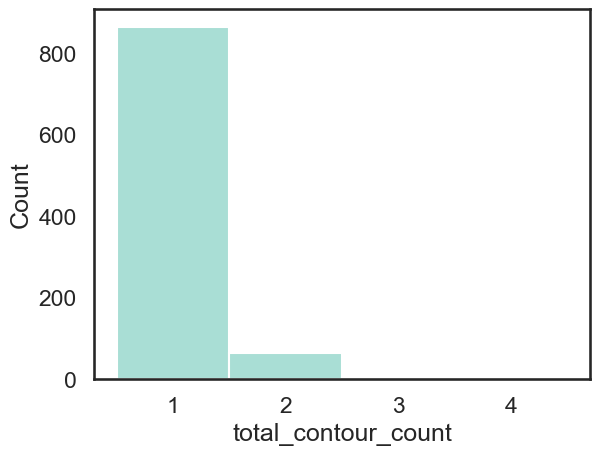

In [13]:
sns.histplot(roi_df.query("contour_area_total > 0"), x = "total_contour_count", discrete=True)

In [42]:
neg = roi_df["neg_contour_area_largest"].to_numpy()
pos = roi_df["pos_contour_area_largest"].to_numpy()

<AxesSubplot: xlabel='total_contour_area_largest', ylabel='dom_centroids'>

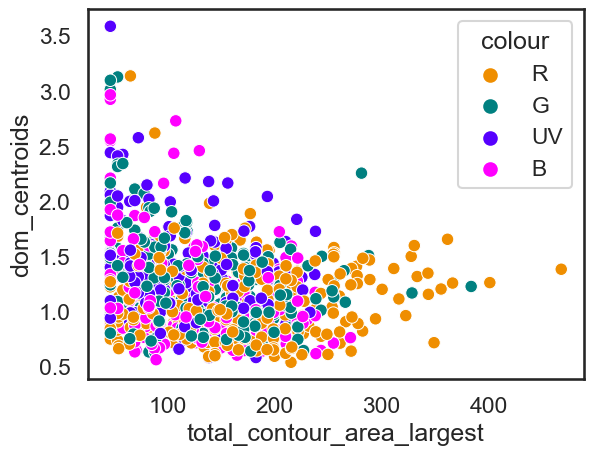

In [77]:
sns.scatterplot(data = roi_df.query("total_contour_area_largest > 0"), x = "total_contour_area_largest", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette)

In [26]:
roi_df.query("polarity == 1")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids


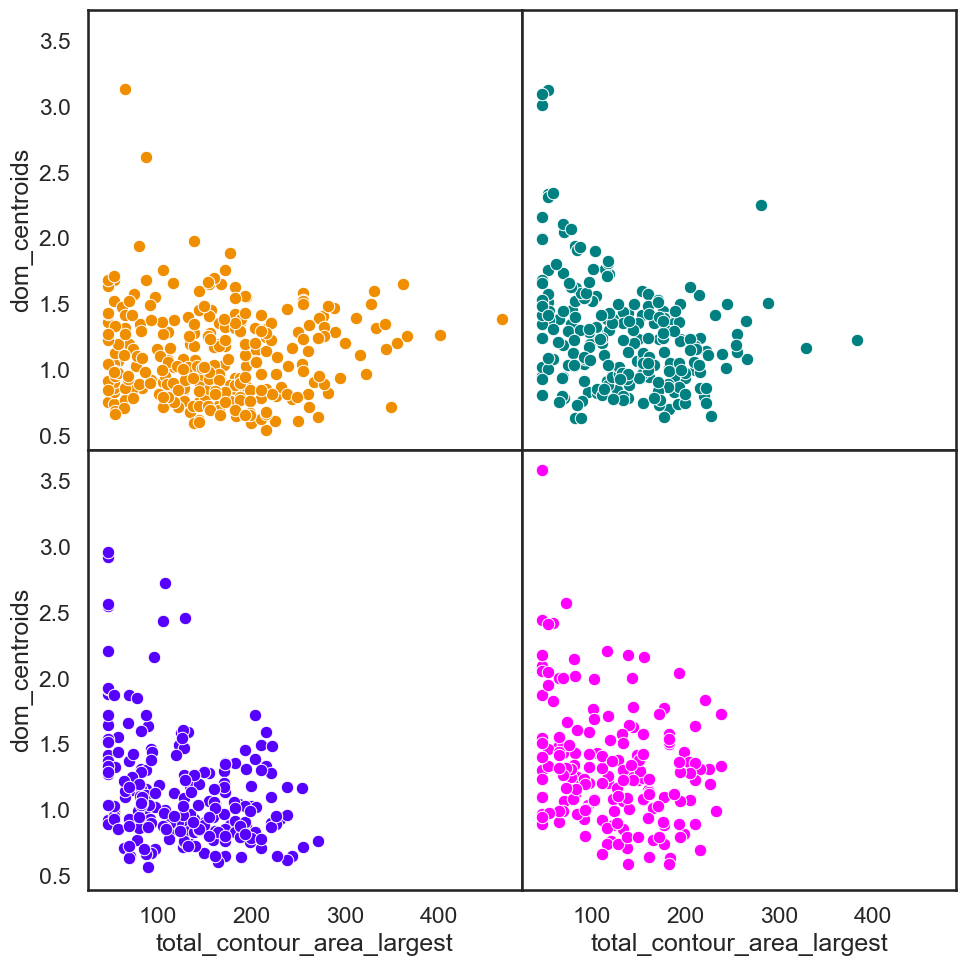

In [78]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "total_contour_area_largest", y = "dom_centroids", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
plt.tight_layout()


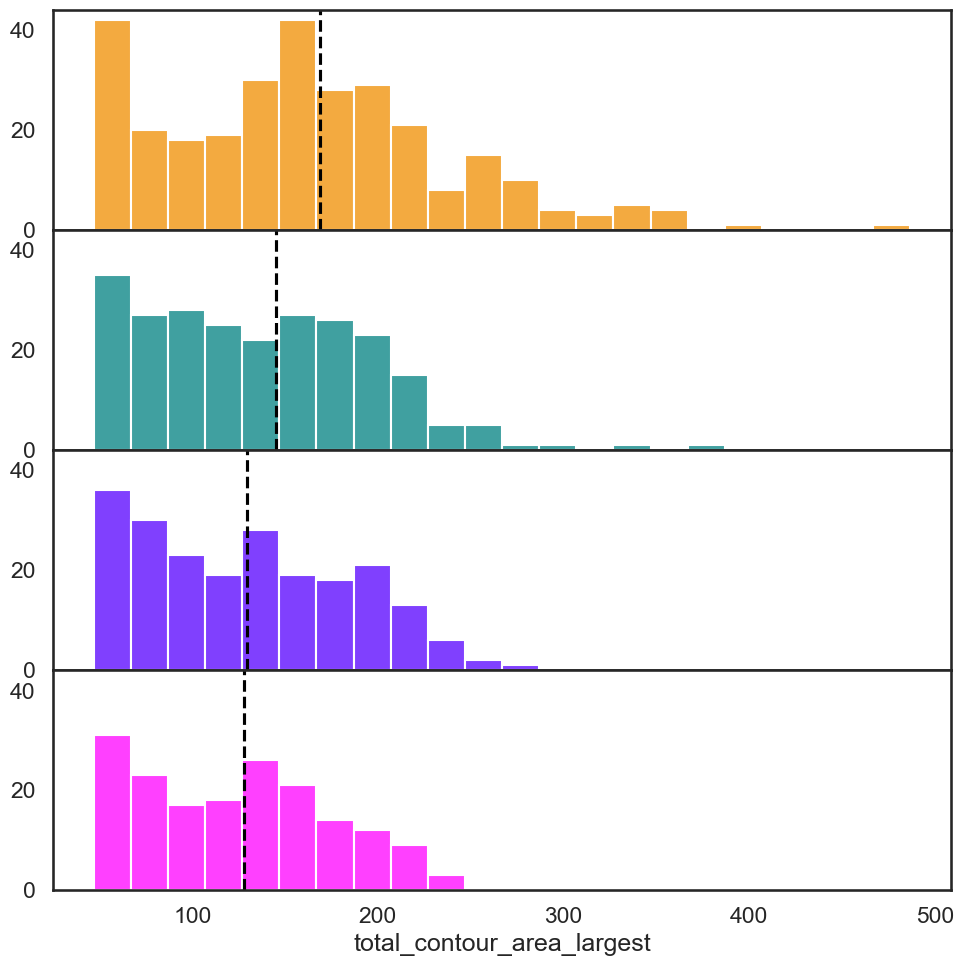

In [16]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars", binwidth=20)
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.average(non_zeros.query(f"colour == '{c}'")["contour_area_total"]), c = "k", ls = "--")
plt.tight_layout()


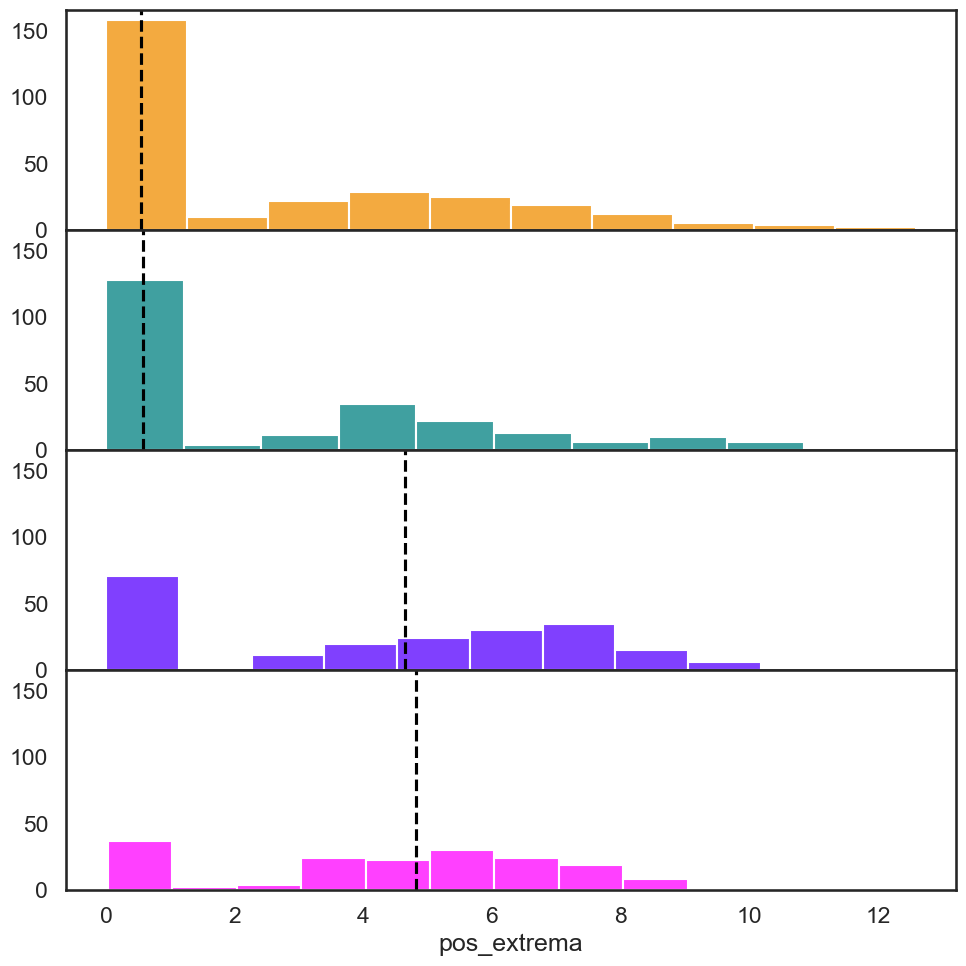

In [36]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
stat = "pos_extrema"
non_zeros = roi_df.query(f"{stat} > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars")
sns.histplot(data = non_zeros.query("colour == 'G'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars")
sns.histplot(data = non_zeros.query("colour == 'B'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars")
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = f"{stat}", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars")
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")[f"{stat}"]), c = "k", ls = "--")
plt.tight_layout()


 Next thing to do is to plot centre-surround tunings, preferably from clusters
 1. Get clustering working 
 2. Get a CS param from each strf_obj
 3. Get a DF param accordingly, where hue = cs_bool/CS-loading 


In [74]:
list_of_objs[0].get_contours_area()

[(array([276.692]), array([0])),
 (array([111.449]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([74.17]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([46.895])),
 (array([110.945]), array([0])),
 (array([69.707]), array([0])),
 (array([46.895]), array([0])),
 (array([0]), array([0])),
 (array([127.614]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([183.272])),
 (array([0]), array([176.605])),
 (array([0]), array([125.02])),
 (array([0]), array([198.906])),
 (array([0]), array([255.492])),
 (array([0]), array([78.581])),
 (array([0]), array([64.57])),
 (array([0]), array([73.042])),
 (array([0]), array([46.895])),
 (array([0]), array([0])),
 (array([0]), array([78.581])),
 (array([0]), array([117.546])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([159.439])),
 (array([0]), array([149.458])),
 (array([65.023]), arr

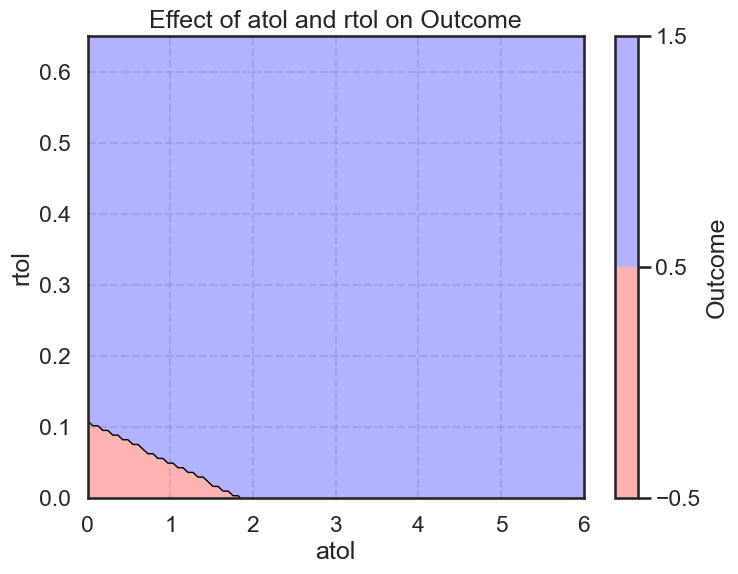

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# Define arrays to compare
a = np.array([4])
b = np.array([5])

# Define a range of atol and rtol values to test
atol_values = np.linspace(0, 6, 100)  # Varying from 0 to 1 linearly
rtol_values = np.linspace(0, .65, 100)  # Varying from 0 to 1 linearly

# Create a meshgrid of atol and rtol values
atol_mesh, rtol_mesh = np.meshgrid(atol_values, rtol_values)

# Initialize an array to store the results
results = np.zeros_like(atol_mesh)

# Iterate through each combination of atol and rtol
for i in range(len(atol_values)):
    for j in range(len(rtol_values)):
        # Compute the result using np.isclose with current atol and rtol
        results[i, j] = np.isclose(a, b, atol=atol_values[i], rtol=rtol_values[j]).all()

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.3)
plt.colorbar(label='Outcome')
plt.contour(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5], colors='k', linestyles='-', linewidths=1)
plt.xlabel('atol')
plt.ylabel('rtol')
plt.title('Effect of atol and rtol on Outcome')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


In [42]:
list_of_objs[0].get_polarities()

array([2., 2., 0., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0.,
       0., 2., 0., 0., 2., 2., 2., 2., 2., 2.])

In [82]:
roi_df.filter(items = ["contour_area_total", "colour"]).groupby("colour").describe().reindex(['R', 'G', 'B', 'UV'])

contour_area_total                                                      \
                    count        mean         std  min  25%      50%      75%   
colour                                                                          
R                   485.0  159.752089  166.527485  0.0  0.0  143.676  250.096   
G                   485.0  115.184019  148.808341  0.0  0.0    0.000  198.908   
B                   485.0   92.912903  124.020294  0.0  0.0    0.000  172.890   
UV                  485.0   69.439860  112.254040  0.0  0.0    0.000  133.464   

                 
            max  
colour           
R       969.876  
G       819.898  
B       633.930  
UV      643.612

In [46]:
stat = "dom_centroids"
Rs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'R' & contour_area_total > 0")
Gs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'G' & contour_area_total > 0")
Bs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'B' & contour_area_total > 0")
Uvs = roi_df.filter(items =[f"{stat}", "contour_area_total", "colour"]).query("colour == 'UV' & contour_area_total > 0")
F, p = scipy.stats.f_oneway(Rs[f"{stat}"], Gs[f"{stat}"], Bs[f"{stat}"], Uvs[f"{stat}"])
print('%.08f' % p)

0.00000000


## Plot population stats by chromaticity

In [78]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:277: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:277: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:277: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\SimenLab\Git_repos\pygor\src\pygor\strf\analyse.py:277: RuntimeWarning: Mean of empty sl

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588,roi,spatial_X,spatial_Y,temporal_len
0,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,STRF0_0,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0,200,95.0,True,0.000000,...,0.715,0.91,0.0,0.0,2.0,2.0,0,24,40,4
1,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,STRF0_1,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1,200,81.0,True,3.046263,...,0.000,0.78,2.0,0.0,0.0,2.0,1,24,40,4
2,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,STRF0_2,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2,200,81.0,True,0.000000,...,0.455,0.52,0.0,2.0,2.0,2.0,2,24,40,4
3,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,STRF0_3,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3,200,75.0,True,0.000000,...,0.000,0.13,0.0,0.0,0.0,2.0,3,24,40,4
4,2023-11-14,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...,STRF0_4,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4,200,43.0,False,6.070677,...,1.040,1.04,2.0,2.0,2.0,2.0,4,24,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,STRF0_20,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,83.0,True,0.000000,...,0.130,0.00,0.0,2.0,2.0,0.0,20,24,40,4
481,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,STRF0_21,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,61.0,False,0.000000,...,0.000,0.00,0.0,0.0,0.0,0.0,21,24,40,4
482,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,STRF0_22,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,84.0,False,0.000000,...,0.000,0.00,0.0,0.0,0.0,0.0,22,24,40,4
483,2023-08-02,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...,STRF0_23,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,34.0,False,0.000000,...,0.000,0.00,0.0,0.0,0.0,0.0,23,24,40,4


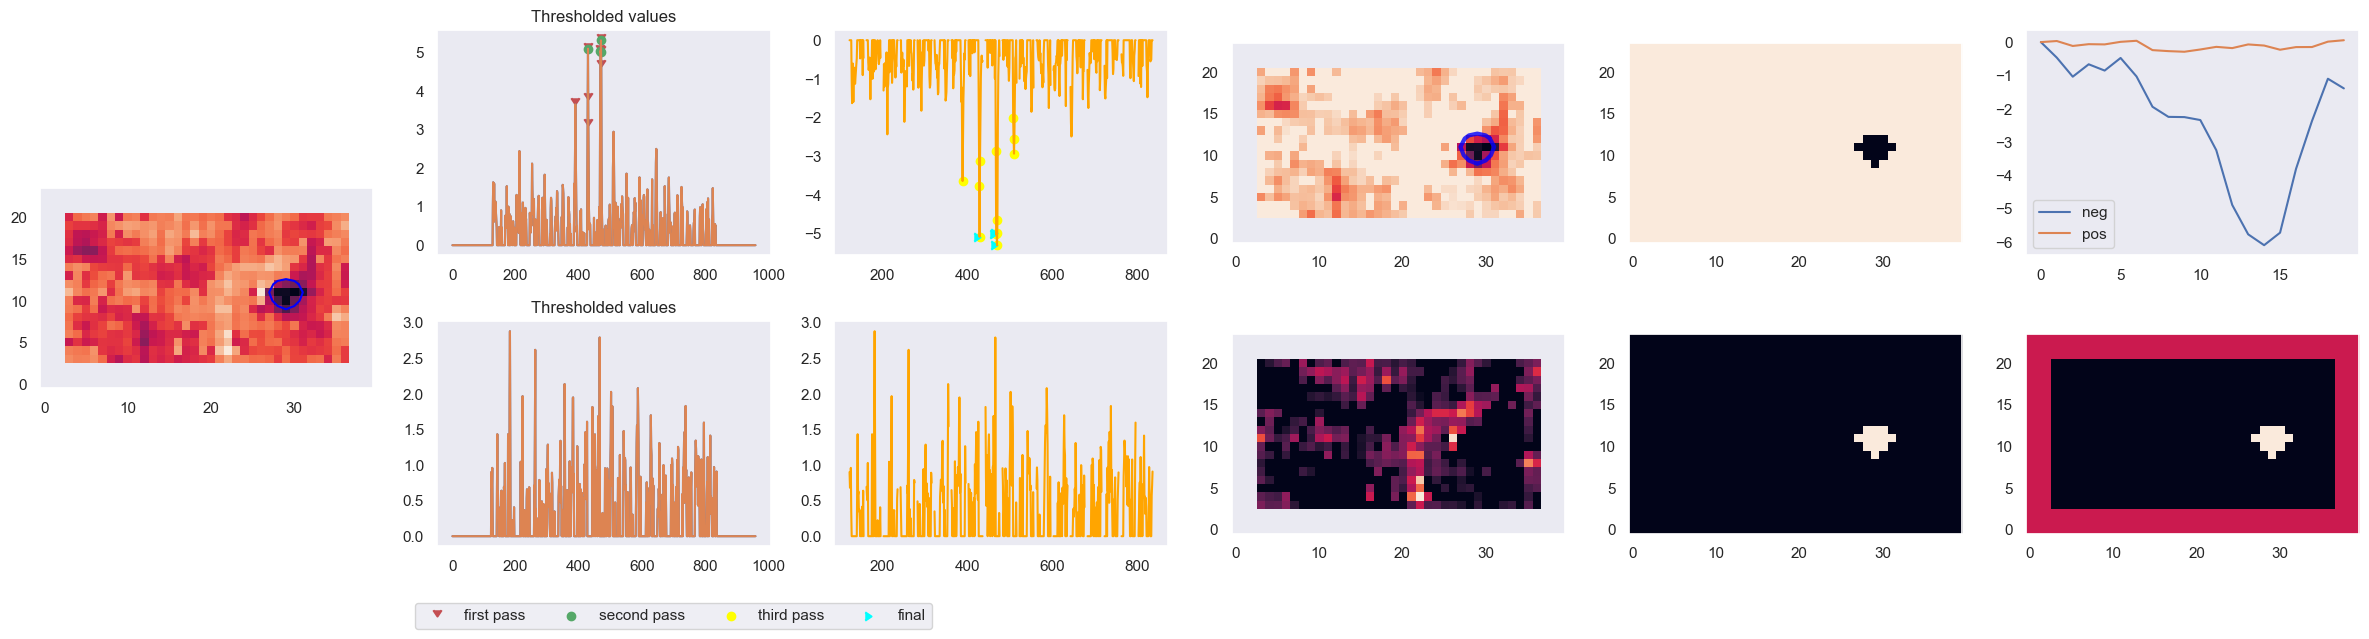

In [76]:
sns.set_theme(style="dark")
list_of_objs[4].demo_contouring(-2)

In [101]:
list_of_objs[0].stim_size

200

In [55]:
chroma_df.columns

Index(['date', 'path', 'filename', 'curr_path', 'strf_keys', 'cell_id', 'size',
       'ipl_depths', 'opp_bool', 'ampl_375', 'ampl_422', 'ampl_478',
       'ampl_588', 'area_375', 'area_422', 'area_478', 'area_588', 'cat_pol',
       'centdom_375', 'centdom_422', 'centdom_478', 'centdom_588',
       'centneg_375', 'centneg_422', 'centneg_478', 'centneg_588',
       'centpos_375', 'centpos_422', 'centpos_478', 'centpos_588', 'comp_375',
       'comp_422', 'comp_478', 'comp_588', 'peakneg_375', 'peakneg_422',
       'peakneg_478', 'peakneg_588', 'peakpos_375', 'peakpos_422',
       'peakpos_478', 'peakpos_588', 'pol_375', 'pol_422', 'pol_478',
       'pol_588', 'roi', 'spatial_X', 'spatial_Y', 'temporal_len'],
      dtype='object')

In [174]:
chroma_df[["area_375", "area_422", "area_478","area_588", "centdom_375", "centdom_422", "centdom_478", "centdom_588"]]

,area_375,area_422,area_478,area_588,centdom_375,centdom_422,centdom_478,centdom_588
0,0.000,0.000,63.896,192.928,0.000000,0.000000,1.237925,1.379600
1,36.992,0.000,0.000,43.052,1.933361,0.000000,0.000000,0.924129
2,0.000,0.000,0.000,63.896,0.000000,0.000000,0.000000,0.885790
3,0.000,0.000,0.000,73.926,0.000000,0.000000,0.000000,0.888328
4,127.606,67.649,117.546,121.386,1.325486,2.027392,1.448103,1.624277
...,...,...,...,...,...,...,...,...
480,0.000,41.100,70.024,0.000,0.000000,1.381570,0.859132,0.000000
481,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
482,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000
483,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000


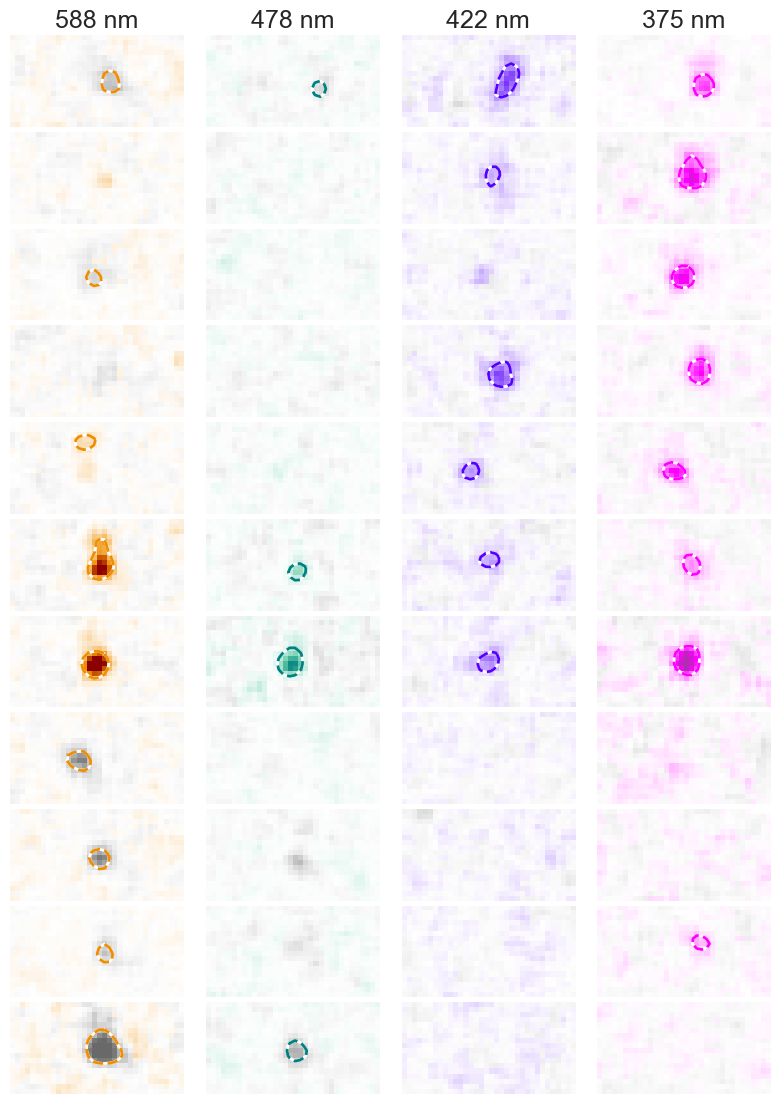

In [175]:
list_of_objs[0].plot_chromatic_overview()

In [90]:
list_of_objs[0].run_bootstrap('y')

Hang on, bootstrapping pygor.strf.temporal components 2500 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 1000 times:   0%|          | 0/44 [00:00<?, ?it/s]

14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours

In [169]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

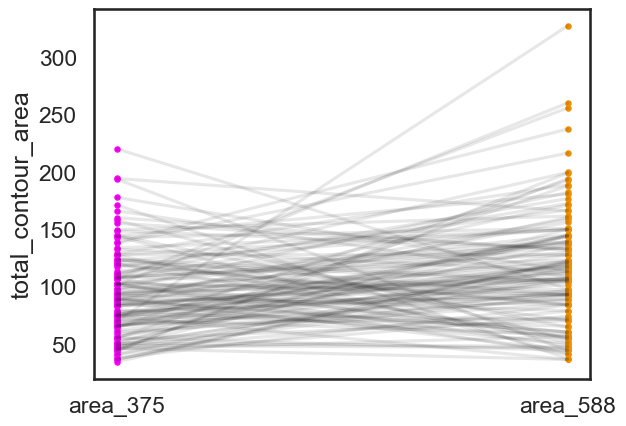

In [176]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

(0.0, 400.0)

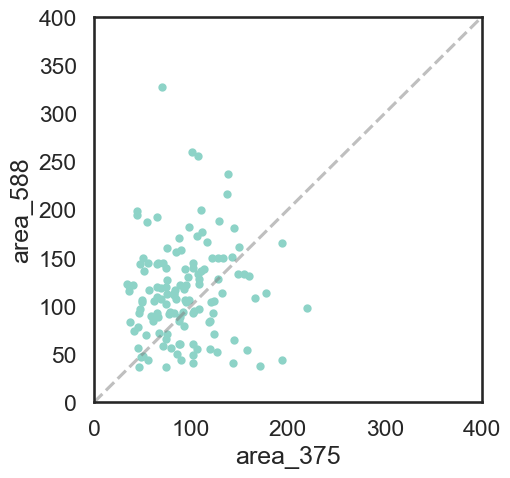

In [184]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 400)
plt.ylim(0, 400)


In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

(10.0, 210.0)

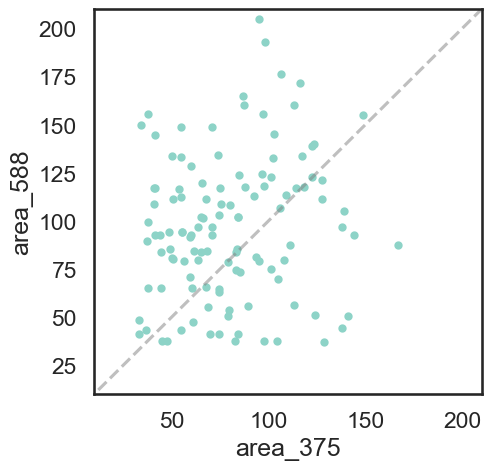

In [193]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(chroma_df["area_375"], chroma_df["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(10, 210)
plt.ylim(10, 210)


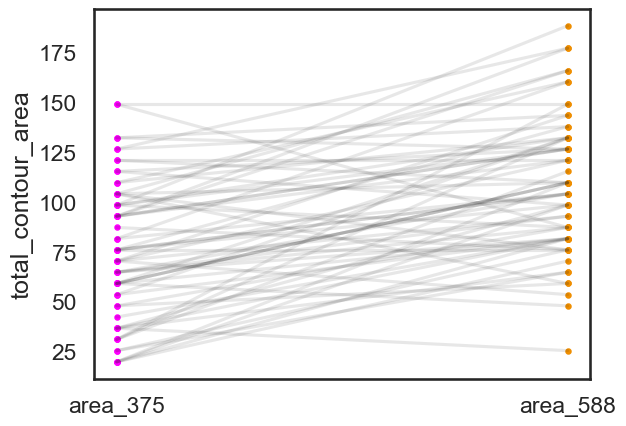

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [140]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

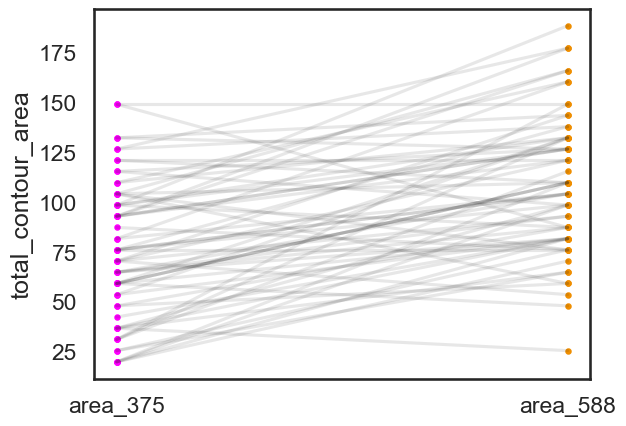

In [141]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [515]:
ruv_colour = [pygor.plotting.custom.fish_palette[-1], pygor.plotting.custom.fish_palette[0]]

<AxesSubplot: >

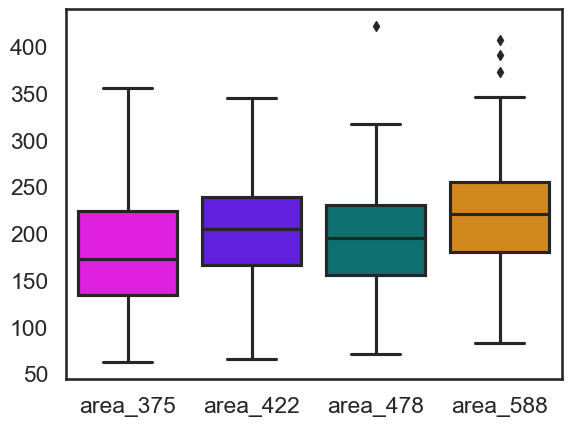

In [119]:
sns.boxplot(data = chroma_df.filter(like = "area").query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1"), palette = reversed(pygor.plotting.fish_palette))

(0.0, 700.0)

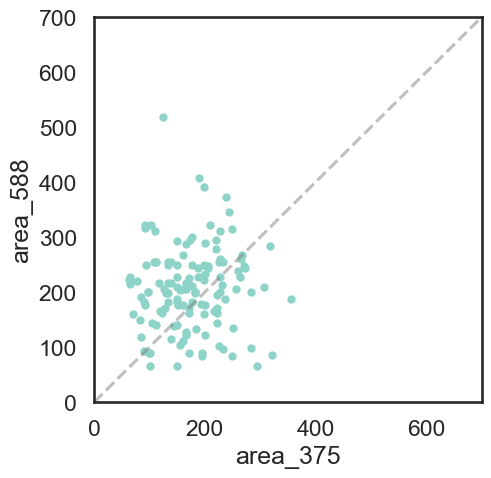

In [120]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 700)
plt.ylim(0, 700)
